In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Admission In Collage/admission_predict.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data = data.drop(['Serial No.'], axis=1)

data.columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

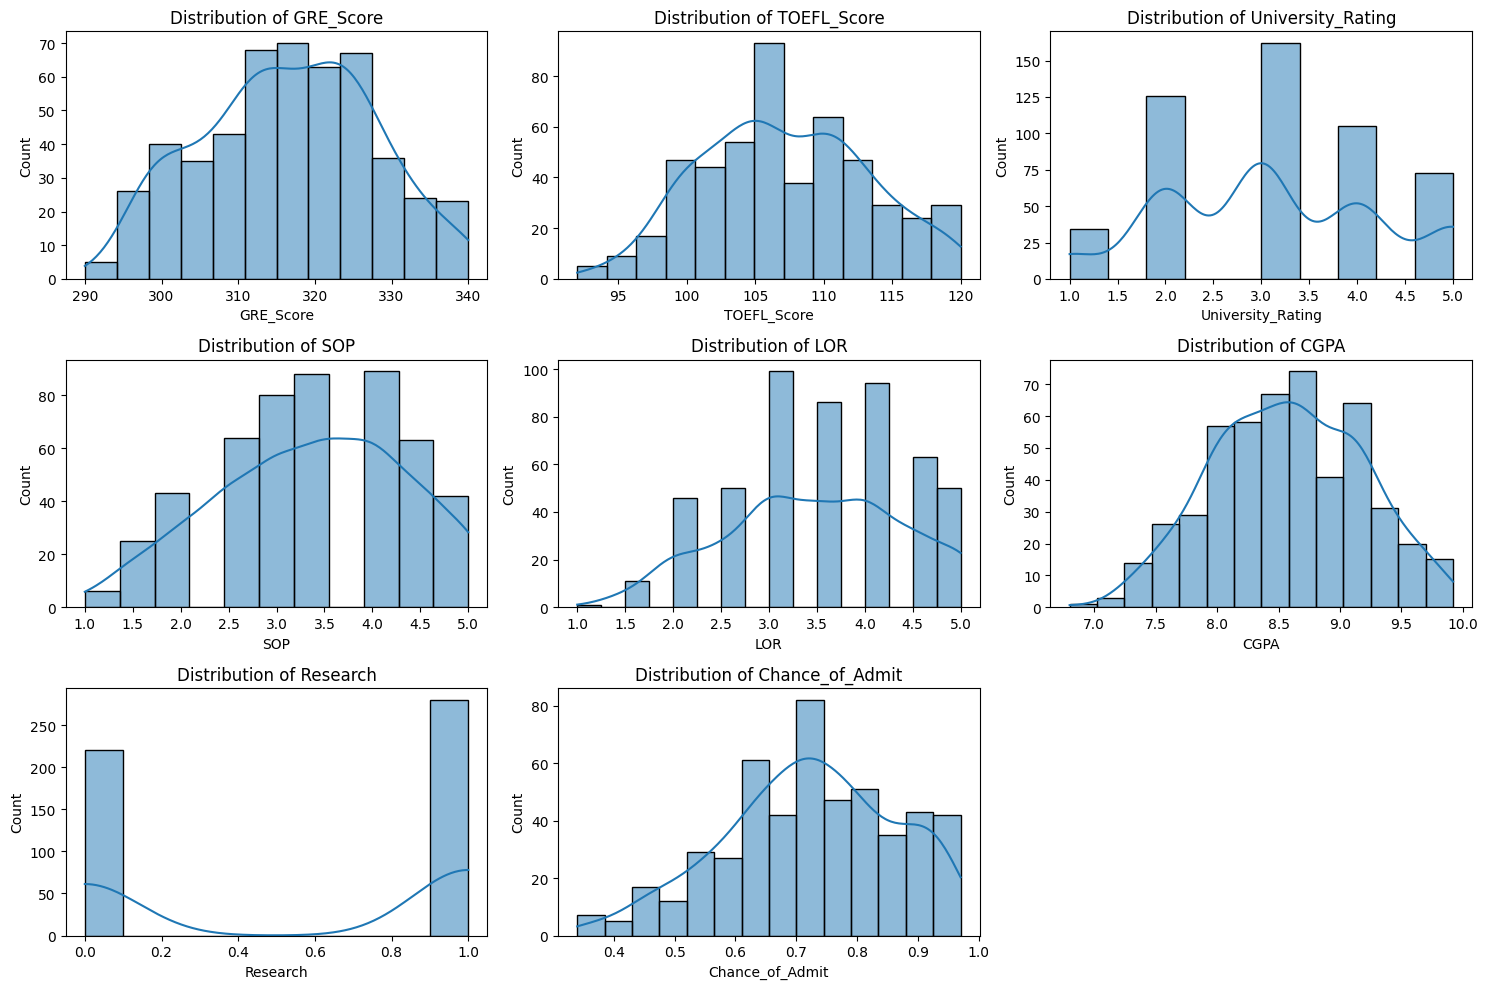

In [ ]:
# Visualize distributions of each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


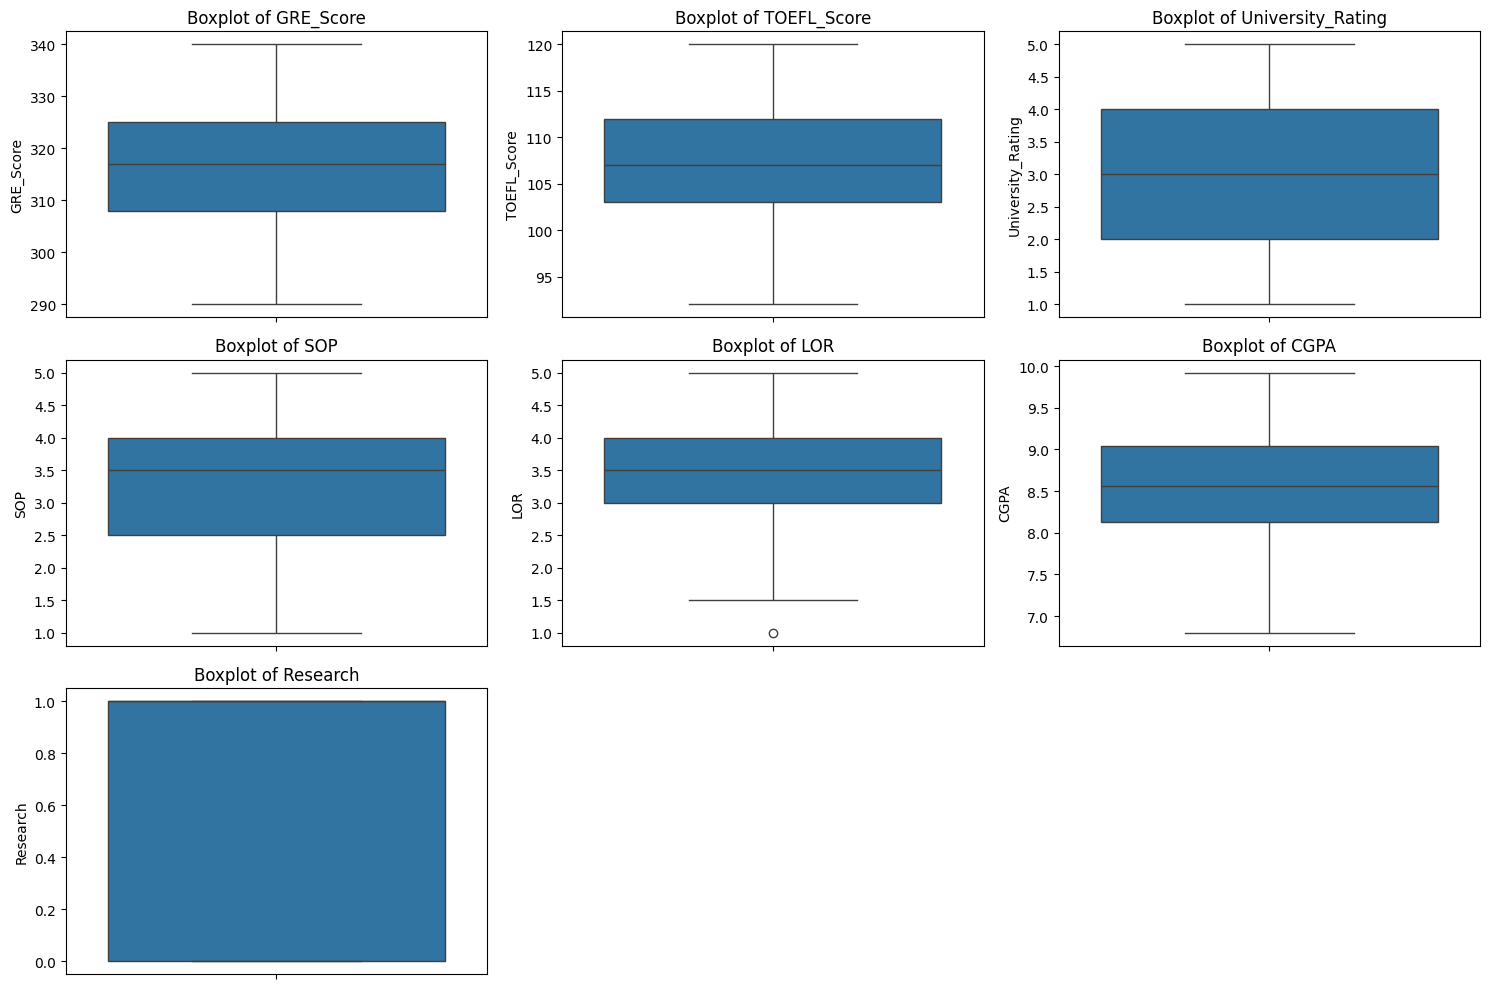

In [ ]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


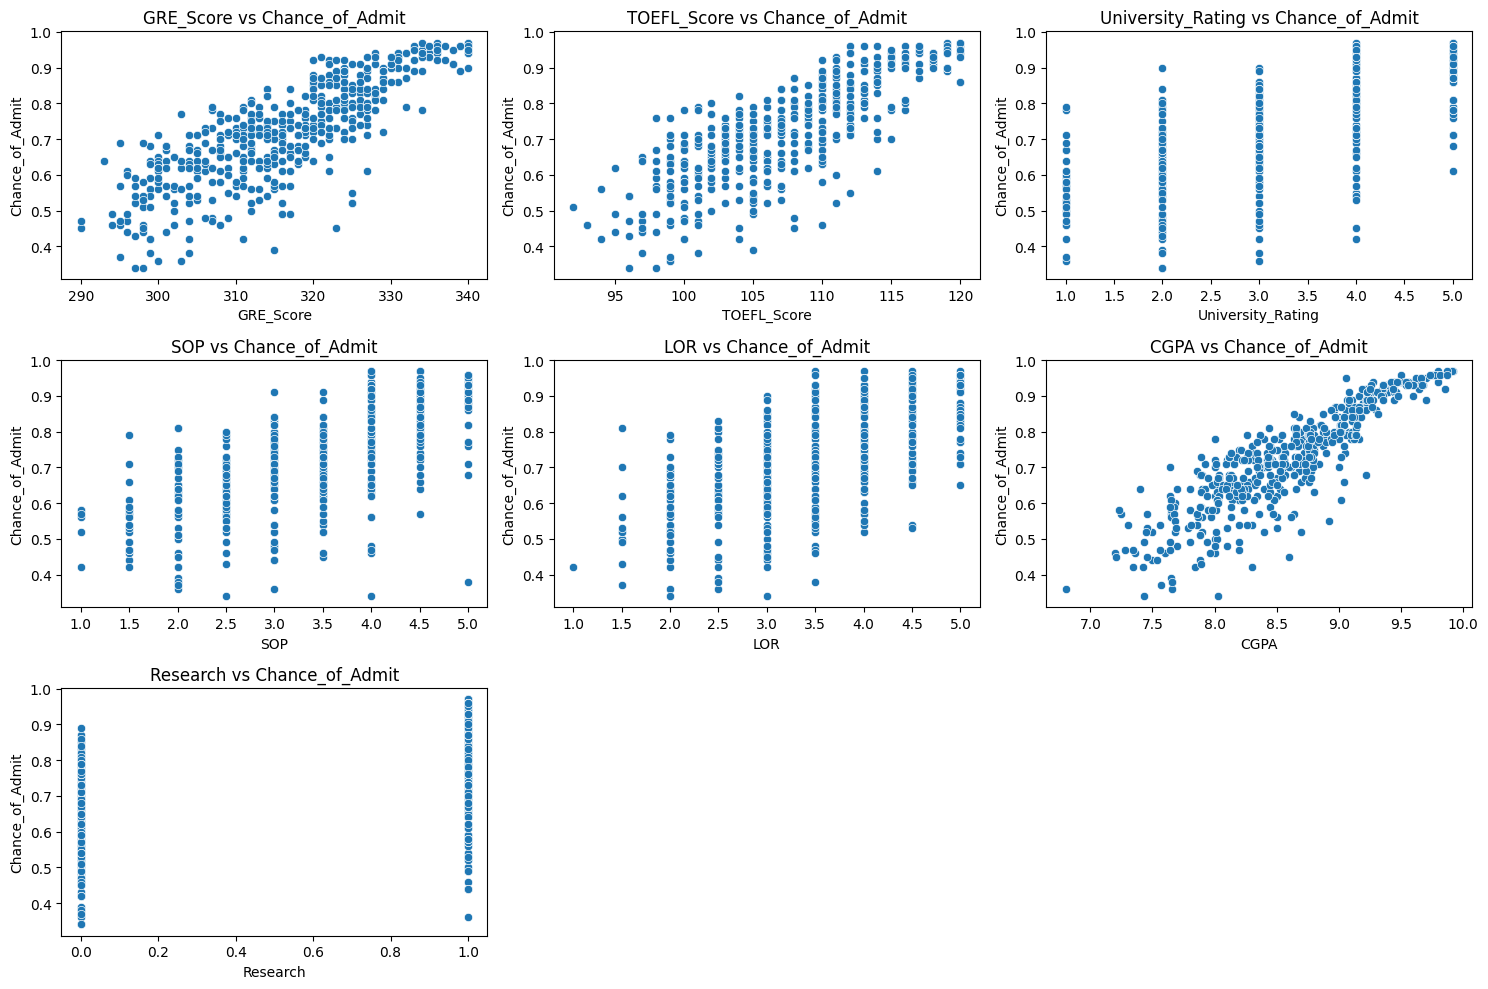

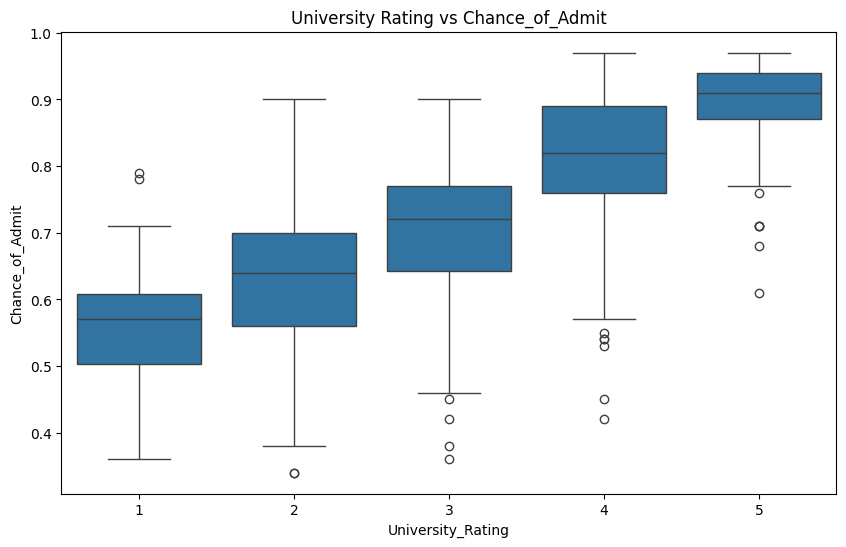

In [ ]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=data[col], y=data['Chance_of_Admit'])
    plt.title(f'{col} vs Chance_of_Admit')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=data['University_Rating'], y=data['Chance_of_Admit'])
plt.title('University Rating vs Chance_of_Admit')
plt.show()


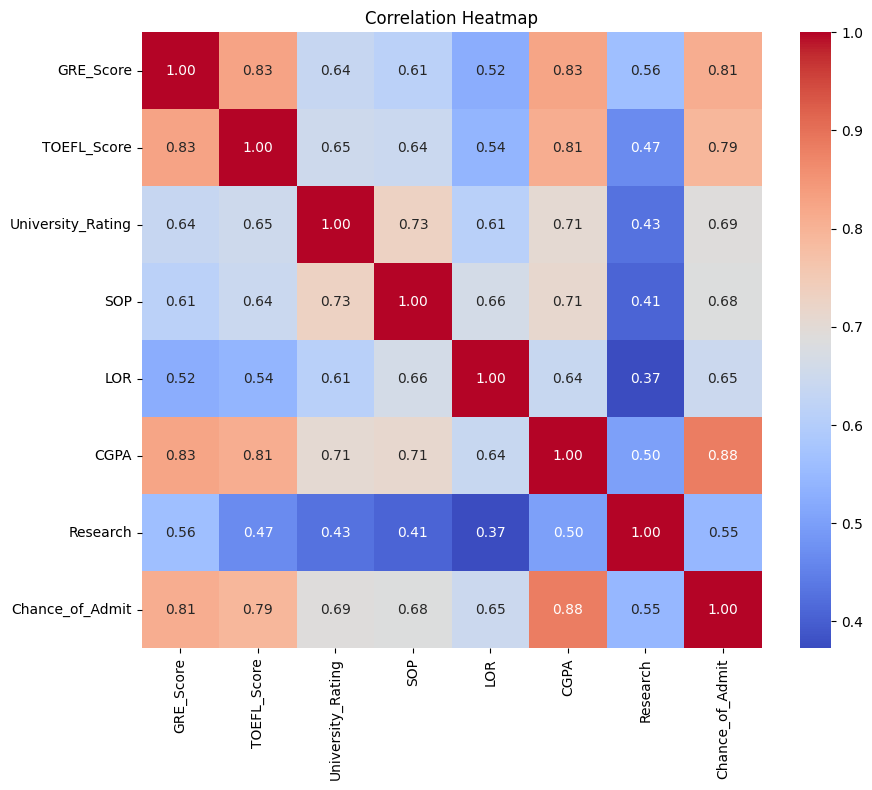

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

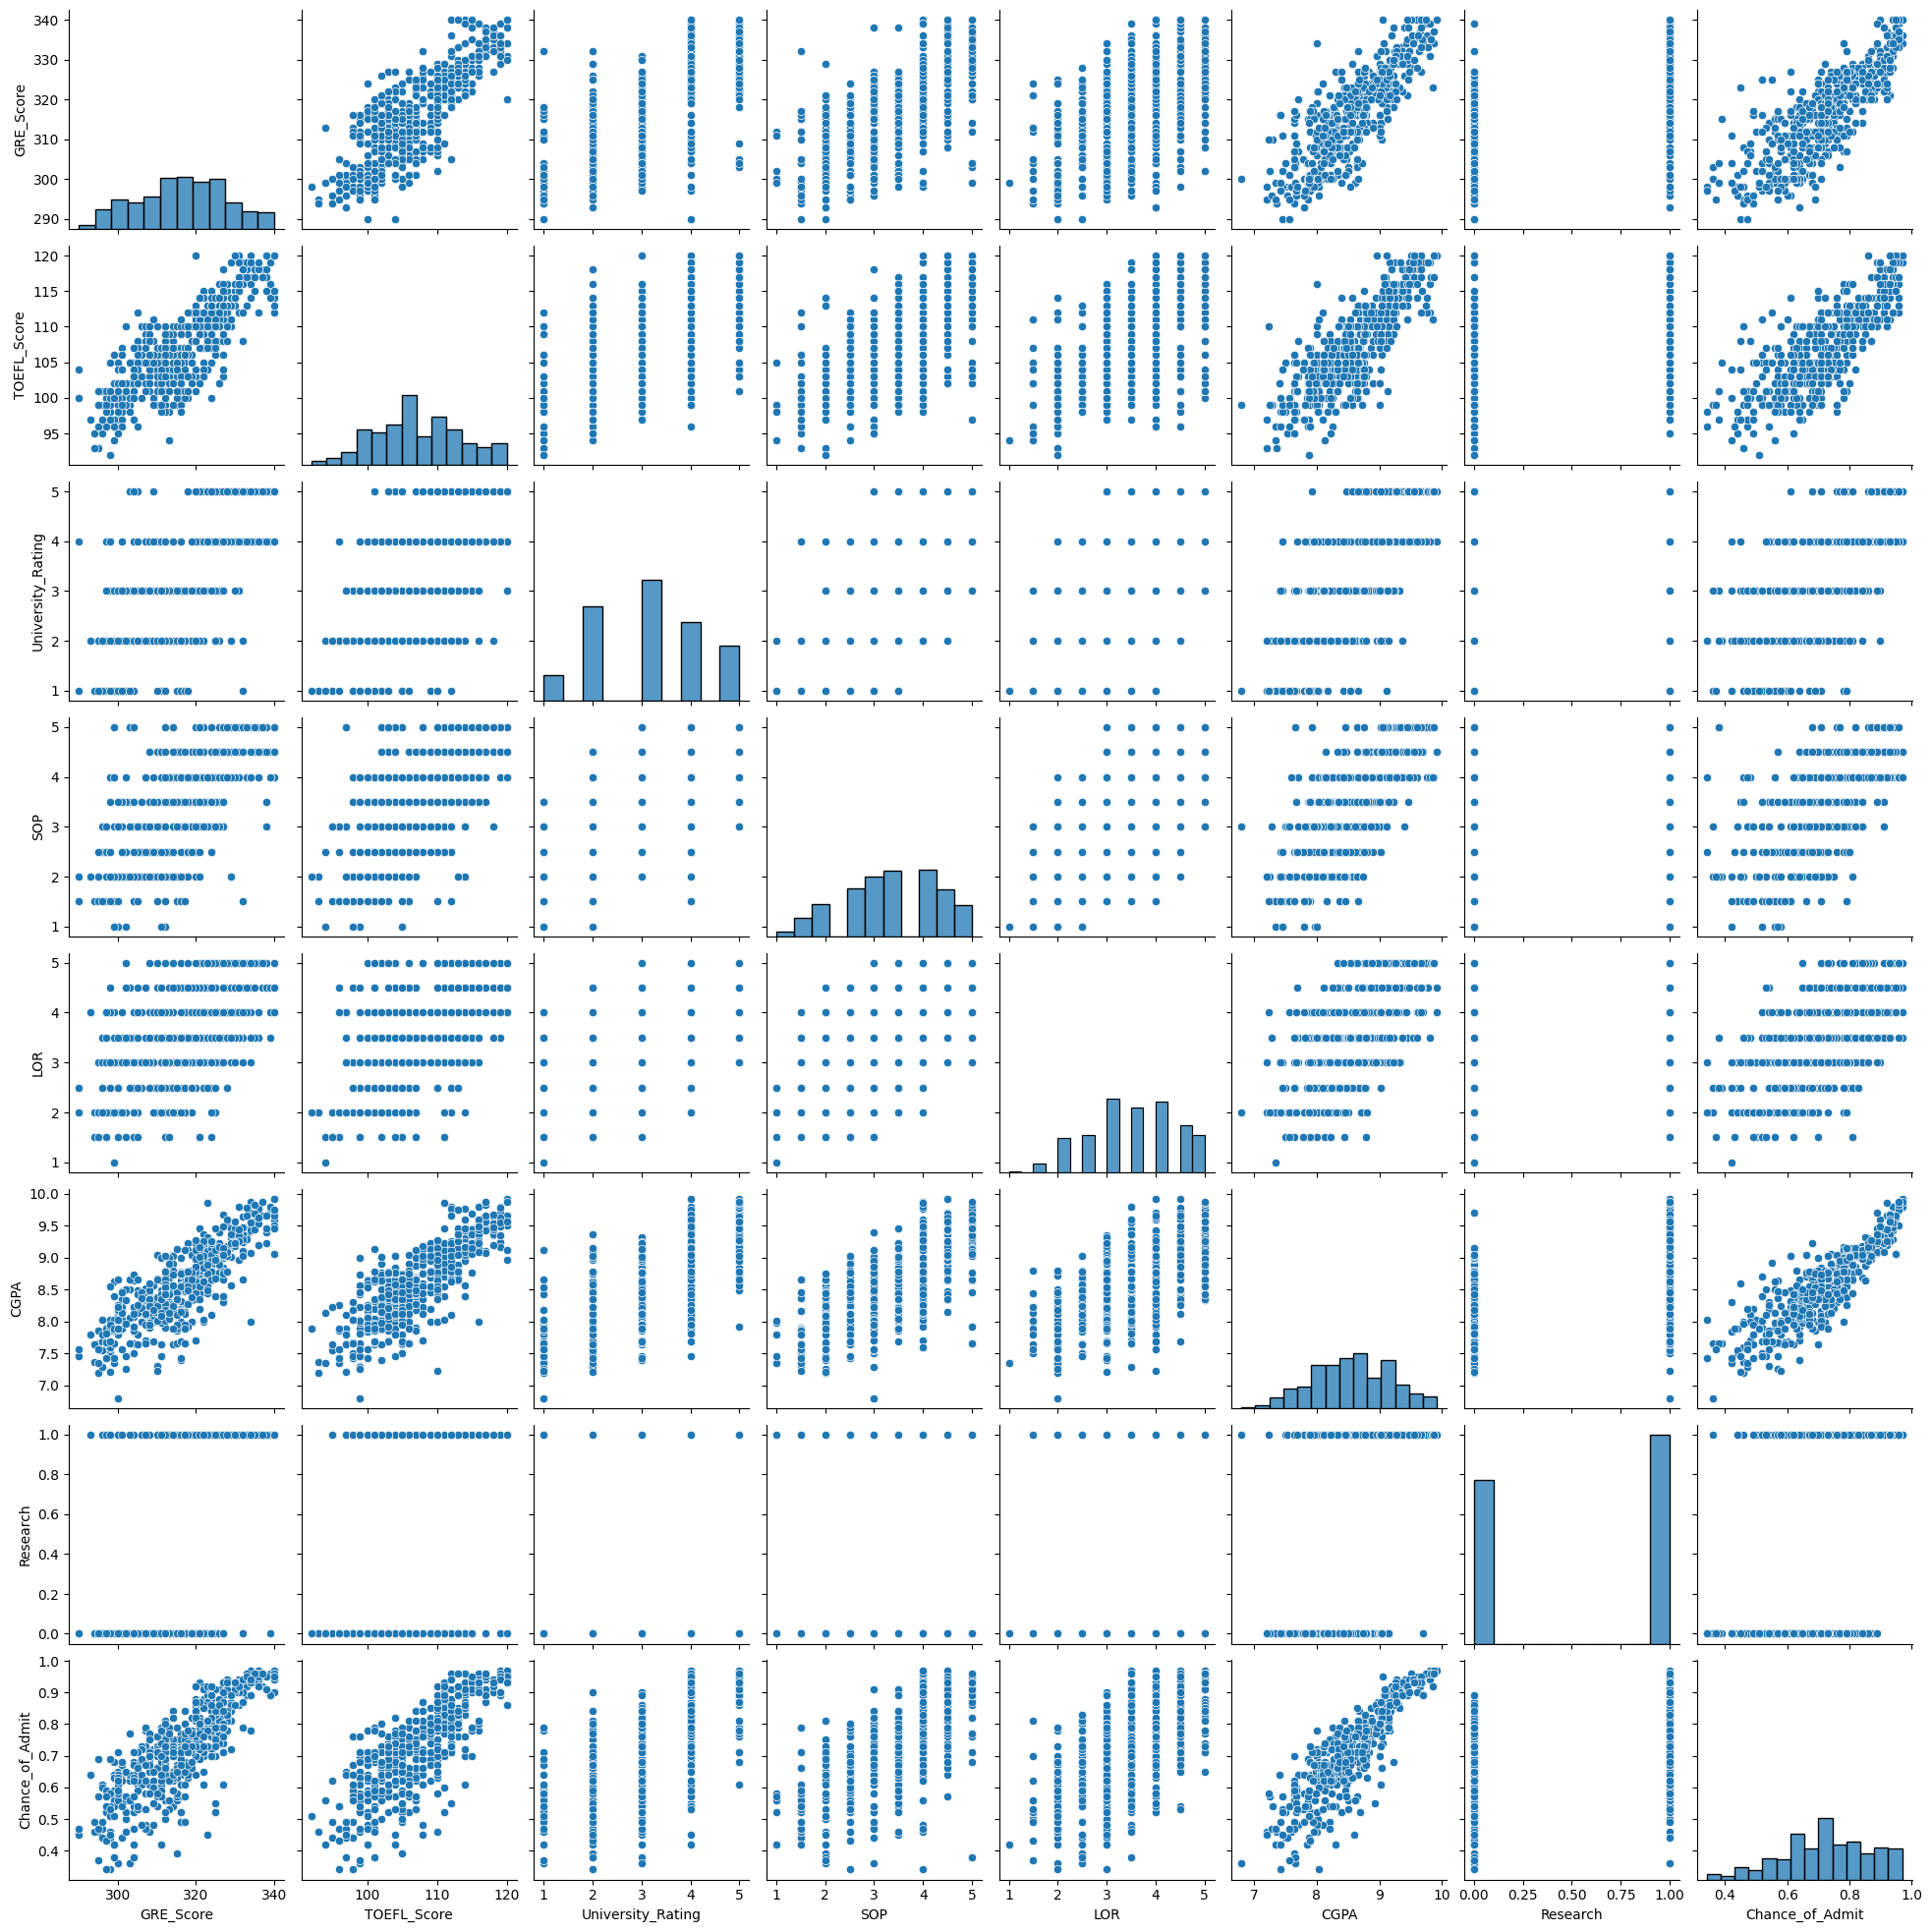

In [ ]:

sns.pairplot(data)
plt.show()

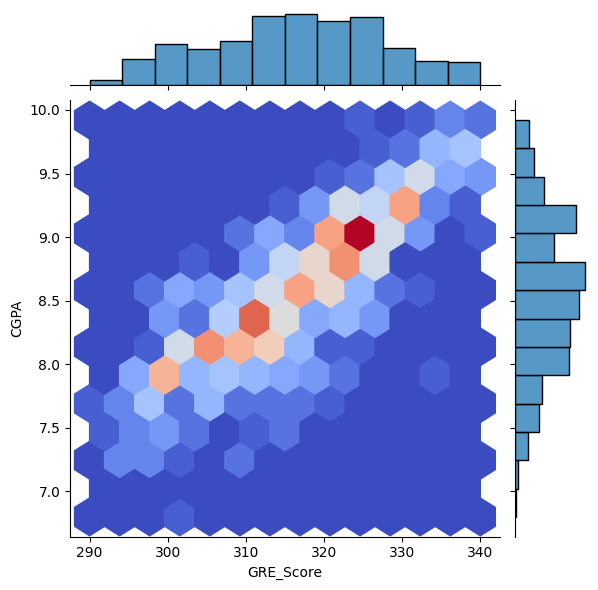

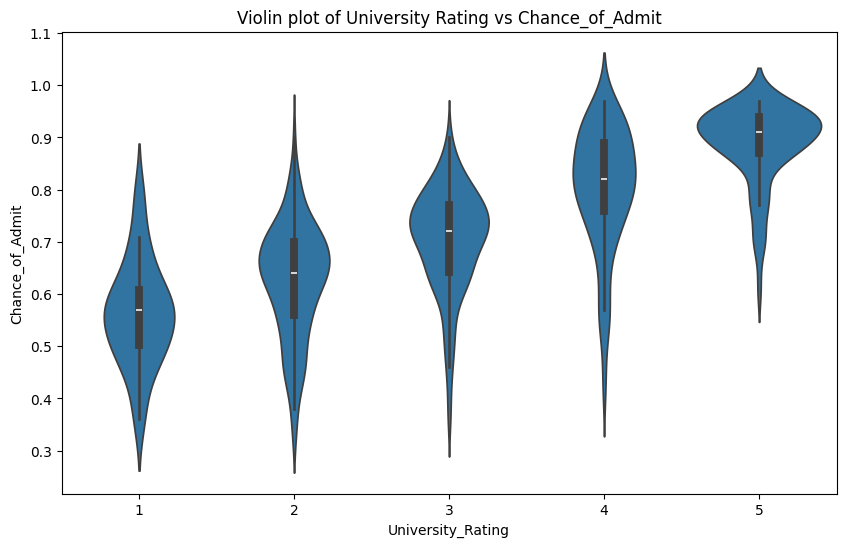

In [ ]:

sns.jointplot(x='GRE_Score', y='CGPA', data=data, kind='hex', cmap='coolwarm')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='University_Rating', y='Chance_of_Admit', data=data)
plt.title('Violin plot of University Rating vs Chance_of_Admit')
plt.show()


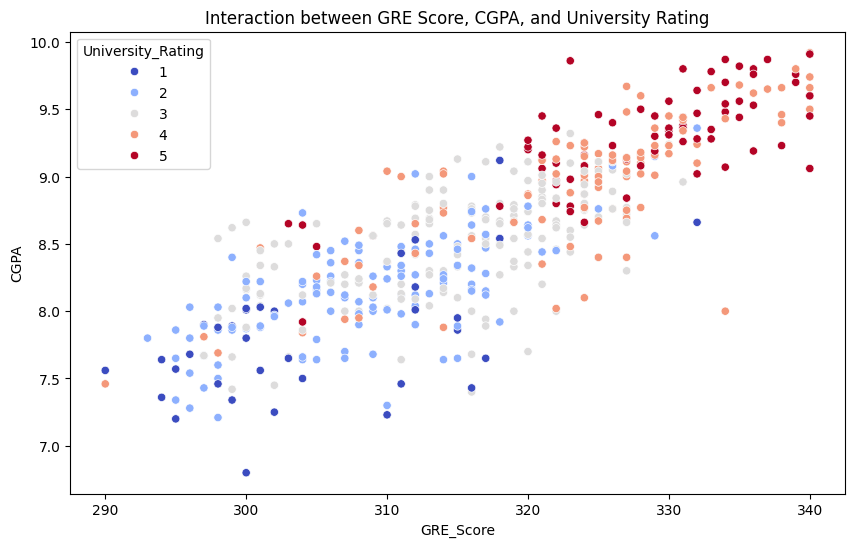

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GRE_Score'], y=data['CGPA'], hue=data['University_Rating'], palette='coolwarm')
plt.title('Interaction between GRE Score, CGPA, and University Rating')
plt.show()

In [ ]:
X = data.drop('Chance_of_Admit', axis=1)
y = data['Chance_of_Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')


Linear Regression RMSE: 0.06086588041578314
Linear Regression R-squared: 0.8188432567829627


In [ ]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest RMSE: 0.06573885456866436
Random Forest R-squared: 0.7886749633251833


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest RMSE: {rmse_best_rf}')
print(f'Best Random Forest R-squared: {r2_best_rf}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest RMSE: 0.062362862543341495
Best Random Forest R-squared: 0.8098226589437797


In [ ]:
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
GRE_Score             0.026671
TOEFL_Score           0.018226
University_Rating     0.002940
SOP                   0.001788
LOR                   0.015866
CGPA                  0.067581
Research              0.011940


In [ ]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'Gradient Boosting R-squared: {r2_gb}')


Gradient Boosting RMSE: 0.06667302972117271
Gradient Boosting R-squared: 0.7826262644400792


In [ ]:
# XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')


XGBoost RMSE: 0.07197327664068756
XGBoost R-squared: 0.7466918068265556


In [ ]:
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(optimizer='adam', loss='mse')

nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)

y_pred_nn = nn_model.predict(X_test_scaled)

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network RMSE: {rmse_nn}')
print(f'Neural Network R-squared: {r2_nn}')


4/4 [==============================] - 0s 3ms/step
Neural Network RMSE: 0.08205736970696077
Neural Network R-squared: 0.6707378032652889


In [ ]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Neural Network'],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb, rmse_xgb, rmse_nn],
    'R-squared': [r2_lr, r2_rf, r2_gb, r2_xgb, r2_nn]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model      RMSE  R-squared
0  Linear Regression  0.060866   0.818843
1      Random Forest  0.065739   0.788675
2  Gradient Boosting  0.066673   0.782626
3            XGBoost  0.071973   0.746692
4     Neural Network  0.082057   0.670738


In [ ]:
from sklearn.model_selection import cross_val_score, KFold


kfold = KFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_val_score(lr_model, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_results)
print(f'Linear Regression Cross-Validation RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')


Linear Regression Cross-Validation RMSE: 0.06062042482819487 ± 0.002817316914247793


In [ ]:

lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression Test RMSE: {rmse_lr}')
print(f'Linear Regression Test R-squared: {r2_lr}')


Linear Regression Test RMSE: 0.06086588041578314
Linear Regression Test R-squared: 0.8188432567829627


In [ ]:
input_data = np.array([[330, 115, 5, 4.5, 4.5, 9.8, 1]])
input_data_scaled = scaler.transform(input_data)
predicted_chance = lr_model.predict(input_data_scaled)
print(f'Chance of getting into UCLA: {predicted_chance[0] * 100:.3f}%')


Chance of getting into UCLA: 95.181%
